# FORECASTING BEER PRODUCTION

We are using Beer production data to find the sales between 1956 to 1995 and applying a simple model to forecast for 1996.

## Importing libraries

In [34]:
import warnings
import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams

## Load Data

In [35]:
df_data=pd.read_csv(r"D:\PGA11\Capstone Project\monthly beer production.csv")
df_data.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


## Data Preparation

### Dimensions of the dataset

In [36]:
# Checking structure of the data
df_data.shape

(476, 2)

### Statistical summary

In [37]:
df_data.describe()

,Monthly beer production
count,476.000000
mean,136.395378
std,33.738725
min,64.800000
25%,112.900000
50%,139.150000
75%,158.825000
max,217.800000


### Missing values

In [38]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


### Indexing with Date

In [39]:
df_data.columns=['date','production']
df_data['date']= pd.DatetimeIndex(df_data['date'])
df_data['year'] = pd.DatetimeIndex(df_data['date']).year
df_data['month'] = pd.DatetimeIndex(df_data['date']).month
df_data.head()

,date,production,year,month
0,1956-01-01,93.2,1956,1
1,1956-02-01,96.0,1956,2
2,1956-03-01,95.2,1956,3
3,1956-04-01,77.1,1956,4
4,1956-05-01,70.9,1956,5


In [40]:
cols=['year','month']
df_data.drop(cols, axis=1, inplace=True)
df_data.head()

,date,production
0,1956-01-01,93.2
1,1956-02-01,96.0
2,1956-03-01,95.2
3,1956-04-01,77.1
4,1956-05-01,70.9


In [41]:
df_data.set_index('date', inplace=True)
df_data.index

DatetimeIndex(['1956-01-01', '1956-02-01', '1956-03-01', '1956-04-01',
               '1956-05-01', '1956-06-01', '1956-07-01', '1956-08-01',
               '1956-09-01', '1956-10-01',
               ...
               '1994-11-01', '1994-12-01', '1995-01-01', '1995-02-01',
               '1995-03-01', '1995-04-01', '1995-05-01', '1995-06-01',
               '1995-07-01', '1995-08-01'],
              dtype='datetime64[ns]', name='date', length=476, freq=None)

In [42]:
df_data.head()

,production
date,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


## Time Series Analysis

### Visualizing Data

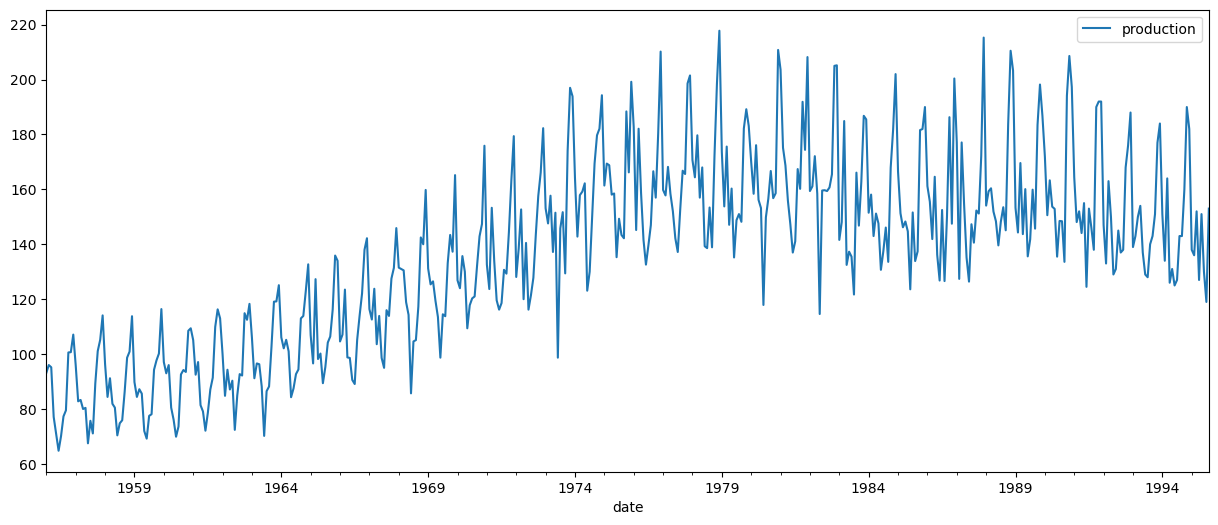

In [43]:
df_data.plot(figsize=(15, 6))
plt.show()

In [44]:
y = df_data['production'].resample('MS').mean()

In [45]:
y

date
1956-01-01     93.2
1956-02-01     96.0
1956-03-01     95.2
1956-04-01     77.1
1956-05-01     70.9
              ...  
1995-04-01    127.0
1995-05-01    151.0
1995-06-01    130.0
1995-07-01    119.0
1995-08-01    153.0
Freq: MS, Name: production, Length: 476, dtype: float64

### Checking Stationarity

If the test statistic is less than the critical value, we can reject the null hypothesis (the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary)

In [46]:
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -2.282661
p-value: 0.177621
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570


The test statistic > critical value, Hence we accept the null hypothesis which implies that the series is not stationary

### Decomposing

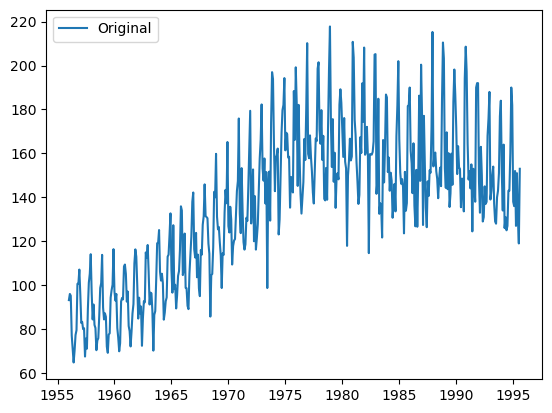

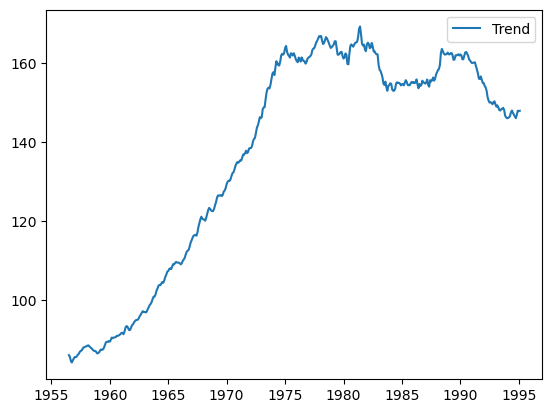

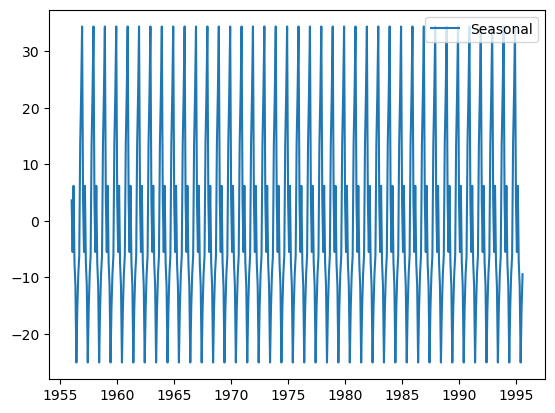

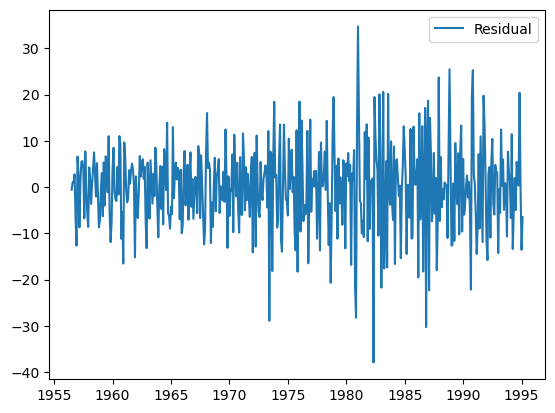

In [47]:
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

## Time Series Forecasting using ARIMA

ARIMA is also denoted as ARIMA(p,d,q) where p,d,q accounts for seasonality, trend and noise in the time series data

In [48]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


### Parameter Selection

In [49]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False, 
enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:6048.483263315012
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:5353.324473760209
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3656.9402892958337
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3533.4029545819753
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3663.927823726336
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3613.336411590876
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3545.1636287409438
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3535.3960111652223
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:5461.584624684906
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4916.811619563311
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3648.080979151877
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3528.3229566211753
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3662.026415315383


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3609.0641479965875
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3547.0678258190437
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3530.3129837883253
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4170.542605855216
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3966.060096945922
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:4002.149712825727
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:3707.6289942673457
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:3905.725107345436
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:3800.847430134343
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:3851.6763076378566
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:3709.3400980381994
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:4129.179521190943
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:3833.0693652212526
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:3630.499449203863
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:3380.330041186558
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:3607.1986402384055
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:3469.9954159122467
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:3501.8305213157023


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:3478.8887105686263
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:3527.708387558111
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:3517.507324076627
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:4147.1576203382765
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:3912.5303159023824
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:3870.913985117186
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:3583.6809889196593
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:3797.663626762287
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:3673.737198680539
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:3716.6665418400376
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:3585.5295235597923
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:4049.463221218123
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:3799.8300061554546
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:3623.1523546272747
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:3370.1283803809238
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:3597.8154941764624
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:3459.4424029867305
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:3484.698980647415

### Fitting the ARIMA model

In [50]:
model = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_results = model.fit()
print(model_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         production   No. Observations:                  476
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1681.064
Date:                            Fri, 26 May 2023   AIC                           3370.128
Time:                                    11:40:17   BIC                           3386.556
Sample:                                01-01-1956   HQIC                          3376.604
                                     - 08-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1754      0.041     -4.319      0.000      -0.255      -0.096
ma.L1         -0.8805      0.021   

Running model diagnostiscs to check any unusual behaviour

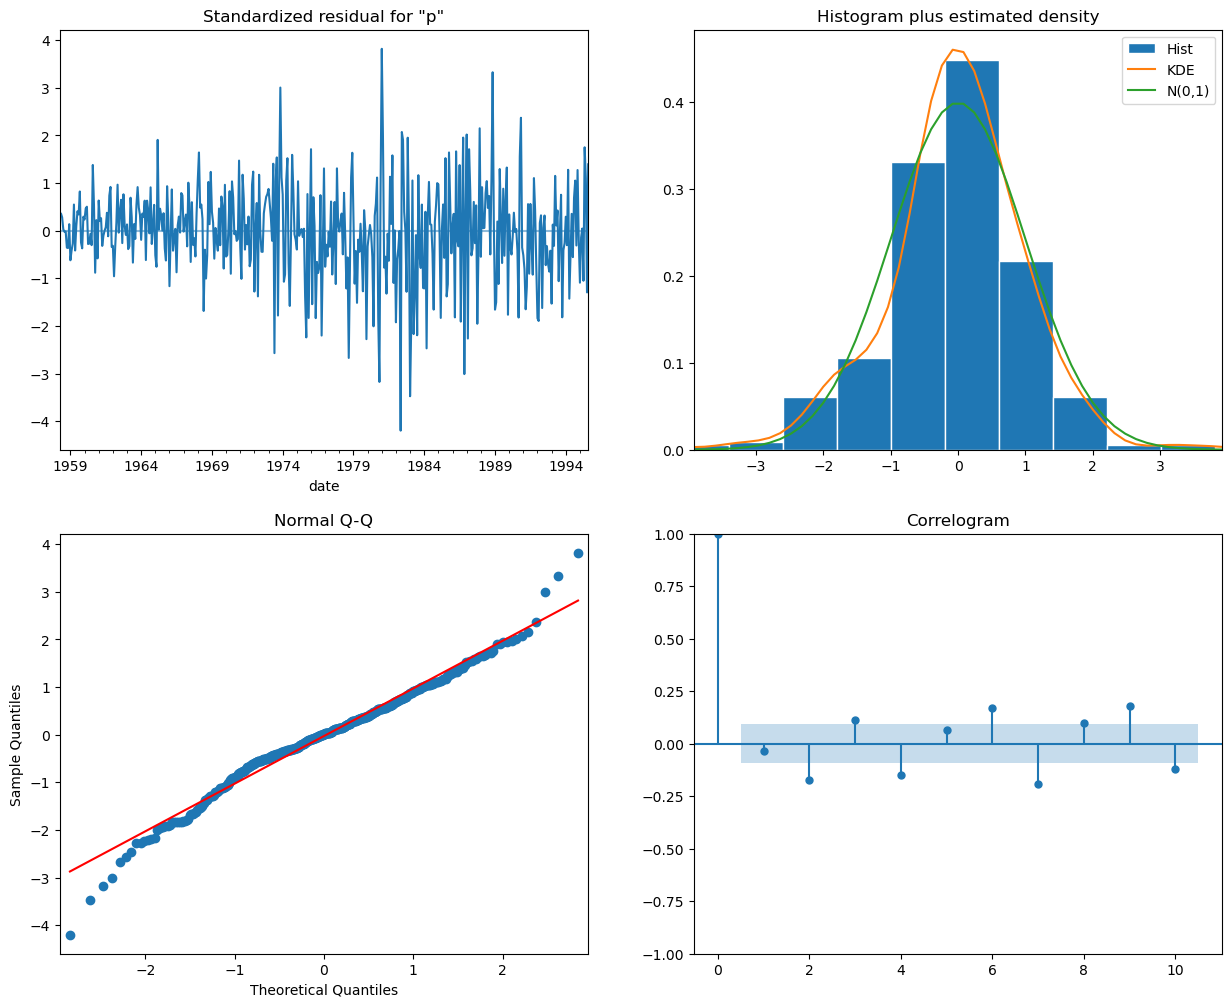

In [51]:
model_results.plot_diagnostics(figsize=(15, 12))
plt.show()

The model diagnostics indicates that the model residuals are near normally distributed

### Validating forecasts

Comparing predicted production to real production of the time series to understand the accuracy of the forecasts

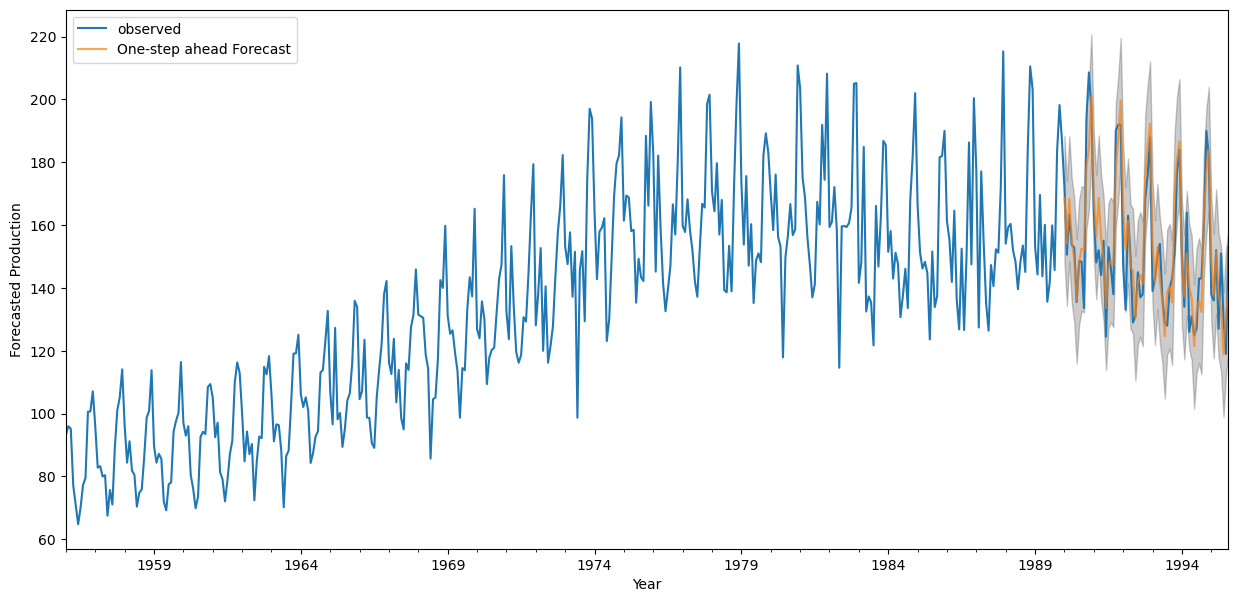

In [52]:
#setting the forecasts to start at 1995-01-01 to the end of the data to forecast
prediction = model_results.get_prediction(start=pd.to_datetime('1990-01-01'), dynamic=False)
prediction_ci = prediction.conf_int()
ax = y['1956':].plot(label='observed')
prediction.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(15, 7))
ax.fill_between(prediction_ci.index,
                prediction_ci.iloc[:, 0],
                prediction_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Year')
ax.set_ylabel('Forecasted Production')
plt.legend()
plt.show()

The above plot indicates the forecasted predictions is an add/drop process for predicting the future over a period of time. The predicated values align well with the true values.

### Calculating MSE and RMSE

In [53]:
y_forecast = prediction.predicted_mean
y_true = y['1995-01-01':]
mse = ((y_forecast - y_true) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 131.17
The Root Mean Squared Error of our forecasts is 11.45


### Visualizing the Forecast

            lower production  upper production
1995-09-01        113.774079        153.499236
1995-10-01        144.604370        184.391423
1995-11-01        158.920829        199.038187
1995-12-01        164.791971        205.093394
1996-01-01        125.929117        166.435894
1996-02-01        115.973218        156.680361
1996-03-01        131.815962        172.723176
1996-04-01        115.953783        157.059976
1996-05-01        115.592818        156.897051
1996-06-01        102.471073        143.972399
1996-07-01        109.145008        150.842494
1996-08-01        118.478800        160.371530
1996-09-01        113.154413        156.365771
1996-10-01        141.360000        184.727254
1996-11-01        156.156410        199.798194
1996-12-01        161.915486        205.806906


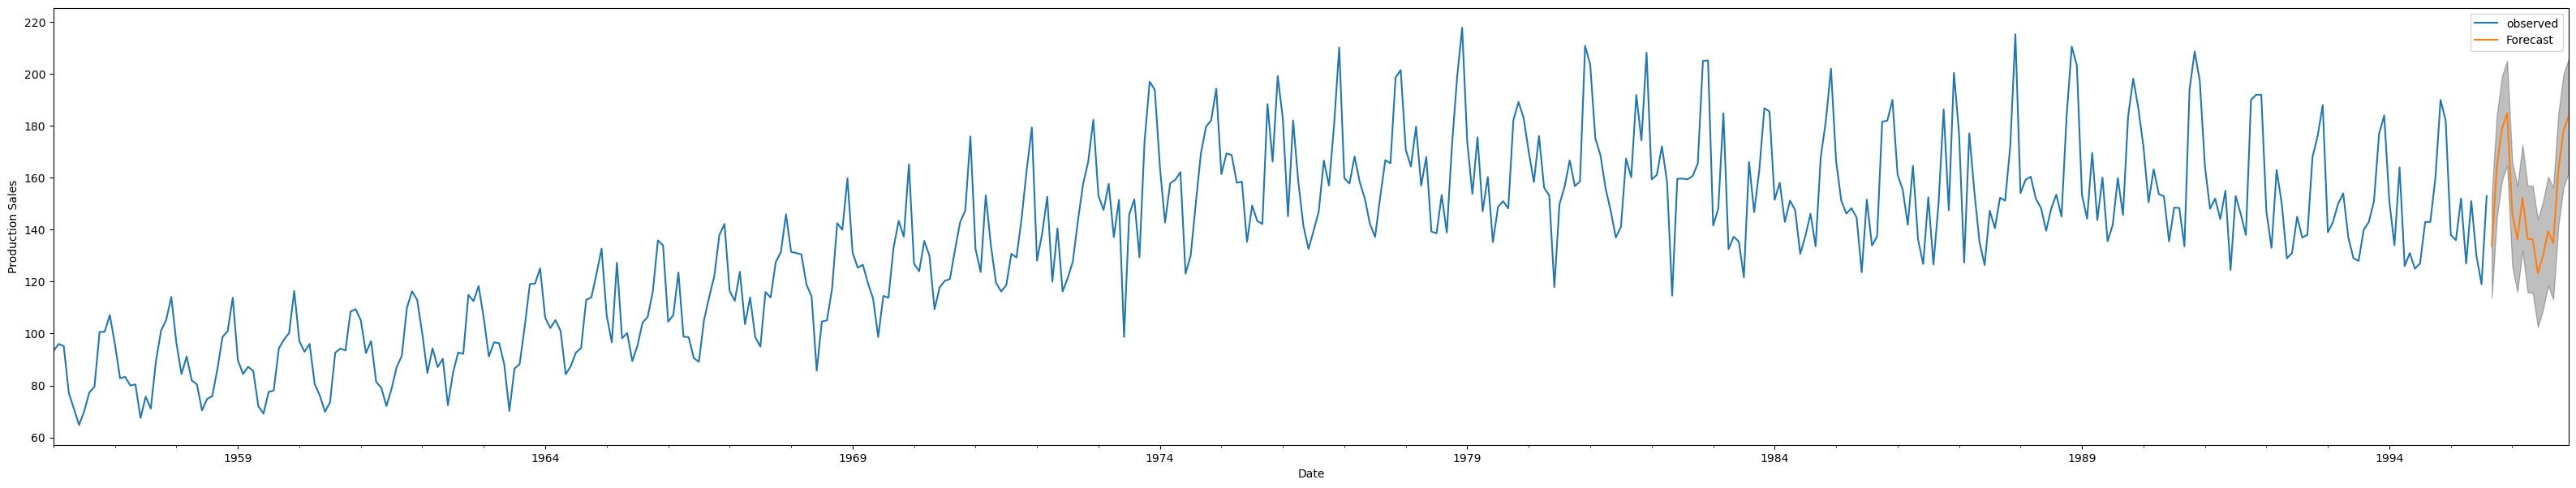

In [54]:
prediction_uc = model_results.get_forecast(steps=16)
prediction_ci = prediction_uc.conf_int()
ax = y.plot(label='observed', figsize=(40, 7))
prediction_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(prediction_ci.index,
                prediction_ci.iloc[:, 0],
                prediction_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Production Sales')
print(prediction_ci)
plt.legend()
plt.show()

## Conclusion

The production sales increases and decreases irrespective of the season.